## Linear Regression - Introduction

Linear regression relates a continuous response (dependent) variable to one or more predictors (features, independent variables), using the assumption that the relationship is linear in nature:
- The relationship between each feature and the response is a straight line when we keep other features constant.
- The slope of this line does not depend on the values of the other variables.
- The effects of each variable on the response are additive (but we can include new variables that represent the interaction of two variables).

In other words, the model assumes that the response variable can be explained or predicted by a linear combination of the features, except for random deviations from this linear relationship.

## Imports & Settings

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

In [4]:
sns.set_style('whitegrid')
pd.options.display.float_format = '{:,.2f}'.format

### Simple Regression

#### Generate random data

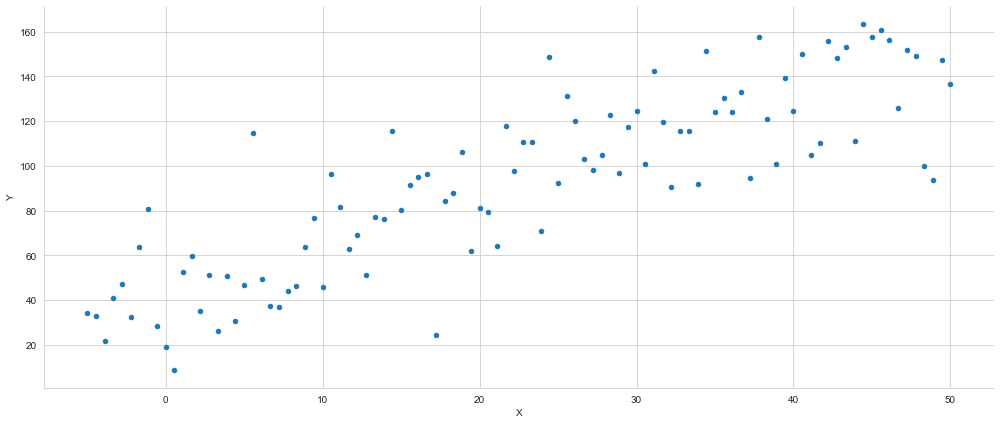

In [4]:
x = np.linspace(-5, 50, 100)
y = 50 + 2 * x + np.random.normal(0, 20, size=len(x))# mean, std, size
data = pd.DataFrame({'X': x, 'Y': y})
ax = data.plot.scatter(x='X', y='Y', figsize=(14, 6))
sns.despine()
plt.tight_layout()

Our linear model with a single independent variable on the left-hand side assumes the following form:

$$y = \beta_0 + \beta_1 X_1 + \epsilon$$

$\epsilon$ accounts for the deviations or errors that we will encounter when our data do not actually fit a straight line. When $\epsilon$ materializes, that is when we run the model of this type on actual data, the errors are called **residuals**.

#### Estimate a simple regression with statsmodels

The upper right part of the panel displays the goodness-of-fit measures just discussed, alongside the F-test that rejects the hypothesis that all coefficients are zero and irrelevant. Similarly, the t-statistics indicate that intercept and both slope coefficients are, unsurprisingly, highly significant.

The bottom part of the summary contains the residual diagnostics. The left panel displays skew and kurtosis that are used to test the normality hypothesis. Both the Omnibus and the Jarque—Bera test fails to reject the null hypothesis that the residuals are normally distributed. The Durbin—Watson statistic tests for serial correlation in the residuals and has a value near 2 which, given 2 parameters and 625 observations, fails to reject the hypothesis of no serial correlation.

Lastly, the condition number provides evidence about multicollinearity: it is the ratio of the square roots of the largest and the smallest eigenvalue of the design matrix that contains the input data. A value above 30 suggests that the regression may have significant multicollinearity.

In [5]:
X = sm.add_constant(data['X'])
model = sm.OLS(data['Y'], X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.725
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     257.8
Date:                Sat, 05 Nov 2022   Prob (F-statistic):           3.41e-29
Time:                        18:11:07   Log-Likelihood:                -447.00
No. Observations:                 100   AIC:                             898.0
Df Residuals:                      98   BIC:                             903.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.6983      3.679     12.150      0.0

#### Verify calculation

In [6]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y)) #np.linalg.inv()矩阵求逆， dot()代表点乘
pd.Series(beta, index=X.columns)

const   44.70
X        2.14
dtype: float64

#### Display model & residuals

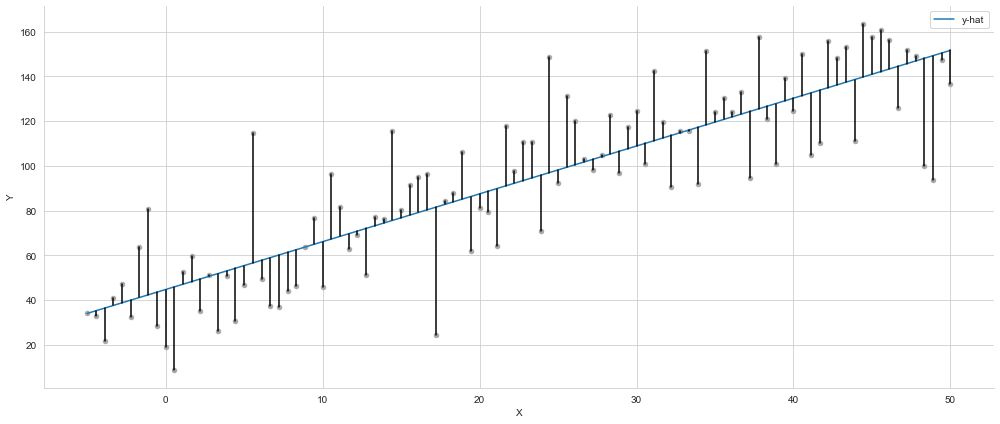

In [12]:
data['y-hat'] = model.predict()
data['residuals'] = model.resid
ax = data.plot.scatter(x='X', y='Y', c='darkgrey', figsize=(14,6))
data.plot.line(x='X', y='y-hat', ax=ax);
for _, row in data.iterrows():
    plt.plot((row.X, row.X), (row.Y, row['y-hat']), 'k-')    
sns.despine()
plt.tight_layout();

### Multiple Regression


For two independent variables, the model simply changes as follows:

$$y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon$$

#### Generate new random data

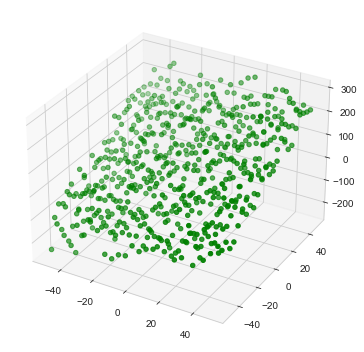

In [22]:
## Create data
size = 25
X_1, X_2 = np.meshgrid(np.linspace(-50, 50, size), np.linspace(-50, 50, size), indexing='ij')#建立空间坐标系的x,y轴
data = pd.DataFrame({'X_1': X_1.ravel(), 'X_2': X_2.ravel()})
data['Y'] = 50 + data.X_1 + 3 * data.X_2 + np.random.normal(0, 50, size=size**2)
## Plot
three_dee = plt.figure(figsize=(15, 5)).gca(projection='3d')
three_dee.scatter(data.X_1, data.X_2, data['Y'], c='g')
sns.despine()
plt.tight_layout();

In [14]:
X_1

array([[-50.        , -50.        , -50.        , -50.        ,
        -50.        , -50.        , -50.        , -50.        ,
        -50.        , -50.        , -50.        , -50.        ,
        -50.        , -50.        , -50.        , -50.        ,
        -50.        , -50.        , -50.        , -50.        ,
        -50.        , -50.        , -50.        , -50.        ,
        -50.        ],
       [-45.83333333, -45.83333333, -45.83333333, -45.83333333,
        -45.83333333, -45.83333333, -45.83333333, -45.83333333,
        -45.83333333, -45.83333333, -45.83333333, -45.83333333,
        -45.83333333, -45.83333333, -45.83333333, -45.83333333,
        -45.83333333, -45.83333333, -45.83333333, -45.83333333,
        -45.83333333, -45.83333333, -45.83333333, -45.83333333,
        -45.83333333],
       [-41.66666667, -41.66666667, -41.66666667, -41.66666667,
        -41.66666667, -41.66666667, -41.66666667, -41.66666667,
        -41.66666667, -41.66666667, -41.66666667, -41.6666

In [15]:
X = data[['X_1', 'X_2']]
y = data['Y']

#### Estimate multiple regression model with statsmodels

The upper right part of the panel displays the goodness-of-fit measures just discussed, alongside the F-test that rejects the hypothesis that all coefficients are zero and irrelevant. Similarly, the t-statistics indicate that intercept and both slope coefficients are, unsurprisingly, highly significant.

The bottom part of the summary contains the residual diagnostics. The left panel displays skew and kurtosis that are used to test the normality hypothesis. Both the Omnibus and the Jarque—Bera test fails to reject the null hypothesis that the residuals are normally distributed. The Durbin—Watson statistic tests for serial correlation in the residuals and has a value near 2 which, given 2 parameters and 625 observations, fails to reject the hypothesis of no serial correlation.

Lastly, the condition number provides evidence about multicollinearity: it is the ratio of the square roots of the largest and the smallest eigenvalue of the design matrix that contains the input data. A value above 30 suggests that the regression may have significant multicollinearity.

In [17]:
X_ols = sm.add_constant(X)
model = sm.OLS(y, X_ols).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                     1115.
Date:                Thu, 10 Nov 2022   Prob (F-statistic):          2.25e-206
Time:                        18:41:29   Log-Likelihood:                -3338.8
No. Observations:                 625   AIC:                             6684.
Df Residuals:                     622   BIC:                             6697.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.9342      2.027     25.126      0.0

#### Verify computation

In [18]:
beta = np.linalg.inv(X_ols.T.dot(X_ols)).dot(X_ols.T.dot(y))
pd.Series(beta, index=X_ols.columns)

const   50.93
X_1      0.95
X_2      3.04
dtype: float64

#### Save output as image

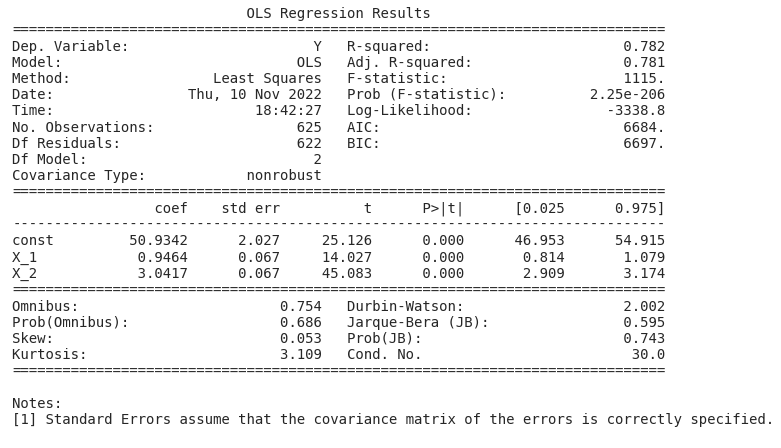

In [19]:
plt.rc('figure', figsize=(12, 7))
plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 14}, fontproperties = 'monospace')
plt.axis('off')
plt.tight_layout()
plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.1)
# plt.savefig('multiple_regression_summary.png', bbox_inches='tight', dpi=300);

#### Display model & residuals

The following diagram illustrates the hyperplane fitted by the model to the randomly generated data points

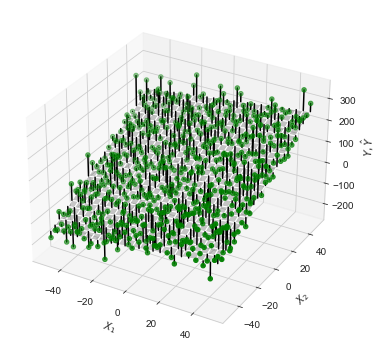

In [20]:
three_dee = plt.figure(figsize=(15, 5)).gca(projection='3d')
three_dee.scatter(data.X_1, data.X_2, data.Y, c='g')
data['y-hat'] = model.predict()
to_plot = data.set_index(['X_1', 'X_2']).unstack().loc[:, 'y-hat']
three_dee.plot_surface(X_1, X_2, to_plot.values, color='black', alpha=0.2, linewidth=1, antialiased=True)
for _, row in data.iterrows():
    plt.plot((row.X_1, row.X_1), (row.X_2, row.X_2), (row.Y, row['y-hat']), 'k-');
three_dee.set_xlabel('$X_1$');three_dee.set_ylabel('$X_2$');three_dee.set_zlabel('$Y, \hat{Y}$')
sns.despine()
plt.tight_layout();

In [31]:
to_plot

X_2,-50.00,-45.83,-41.67,-37.50,-33.33,-29.17,-25.00,-20.83,-16.67,-12.50,...,12.50,16.67,20.83,25.00,29.17,33.33,37.50,41.67,45.83,50.00
X_1,,,,,,,,,,,,,,,,,,,,,
-50.00,-148.47,-135.80,-123.12,-110.45,-97.78,-85.10,-72.43,-59.75,-47.08,-34.41,...,41.64,54.31,66.98,79.66,92.33,105.00,117.68,130.35,143.03,155.70
-45.83,-144.53,-131.85,-119.18,-106.51,-93.83,-81.16,-68.48,-55.81,-43.14,-30.46,...,45.58,58.25,70.93,83.60,96.27,108.95,121.62,134.29,146.97,159.64
-41.67,-140.58,-127.91,-115.24,-102.56,-89.89,-77.22,-64.54,-51.87,-39.19,-26.52,...,49.52,62.20,74.87,87.54,100.22,112.89,125.56,138.24,150.91,163.59
-37.50,-136.64,-123.97,-111.29,-98.62,-85.95,-73.27,-60.60,-47.92,-35.25,-22.58,...,53.47,66.14,78.81,91.49,104.16,116.83,129.51,142.18,154.86,167.53
-33.33,-132.70,-120.02,-107.35,-94.68,-82.00,-69.33,-56.65,-43.98,-31.31,-18.63,...,57.41,70.08,82.76,95.43,108.10,120.78,133.45,146.12,158.80,171.47
-29.17,-128.75,-116.08,-103.41,-90.73,-78.06,-65.39,-52.71,-40.04,-27.36,-14.69,...,61.35,74.03,86.70,99.37,112.05,124.72,137.39,150.07,162.74,175.42
-25.00,-124.81,-112.14,-99.46,-86.79,-74.12,-61.44,-48.77,-36.09,-23.42,-10.75,...,65.30,77.97,90.64,103.32,115.99,128.66,141.34,154.01,166.69,179.36
-20.83,-120.87,-108.19,-95.52,-82.85,-70.17,-57.50,-44.82,-32.15,-19.48,-6.80,...,69.24,81.91,94.59,107.26,119.93,132.61,145.28,157.95,170.63,183.30
-16.67,-116.92,-104.25,-91.58,-78.90,-66.23,-53.56,-40.88,-28.21,-15.53,-2.86,...,73.18,85.86,98.53,111.20,123.88,136.55,149.22,161.90,174.57,187.25


Additional [diagnostic tests](https://www.statsmodels.org/dev/diagnostic.html)

## Stochastic Gradient Descent Regression

The sklearn library includes an SGDRegressor model in its linear_models module. To learn the parameters for the same model using this method, we need to first standardize the data because the gradient is sensitive to the scale. 

### Prepare data

The gradient is sensitive to scale and so is SGDRegressor. Use the `StandardScaler` or `scale` to adjust the features. 

We use StandardScaler() for this purpose that computes the mean and the standard deviation for each input variable during the fit step, and then subtracts the mean and divides by the standard deviation during the transform step that we can conveniently conduct in a single fit_transform() command:

In [46]:
scaler = StandardScaler()
X_ = scaler.fit_transform(X)

In [48]:
X_

array([[-1.66410059, -1.66410059],
       [-1.66410059, -1.52542554],
       [-1.66410059, -1.38675049],
       ...,
       [ 1.66410059,  1.38675049],
       [ 1.66410059,  1.52542554],
       [ 1.66410059,  1.66410059]])

### Configure SGDRegressor

Then we instantiate the SGDRegressor using the default values except for a random_state setting to facilitate replication:

In [33]:
sgd = SGDRegressor(loss='squared_loss', #损失函数使用方差的形式
                   fit_intercept=True, 
                   shuffle=True, #对训练数据进行洗牌
                   random_state=42,#混洗数据
                   learning_rate='invscaling', #使用一种逐渐下降的学习率。在训练的第t步，学习率会变为eta0 / pow(t, power_t(默认值0.5))
                   eta0=0.01, 
                   power_t=0.25)
#eta0为初始学习率，t是迭代的步数

### Fit Model

Now we can fit the sgd model, create the in-sample predictions for both the OLS and the sgd models, and compute the root mean squared error for each:

In [39]:
# sgd.n_iter = np.ceil(10**6 / len(y))
sgd.fit(X=X_, y=y)

SGDRegressor(loss='squared_loss', random_state=42)

In [40]:
sgd.coef_

array([28.29813095, 91.55158406])

In [41]:
scaler.scale_

array([30.04626063, 30.04626063])

In [49]:
coeffs = (sgd.coef_ / scaler.scale_)
pd.Series(coeffs, index=X.columns)

X_1   0.94
X_2   3.05
dtype: float64

In [43]:
resids = pd.DataFrame({'sgd': y - sgd.predict(X_),
                      'ols': y - model.predict(sm.add_constant(X))})

In [50]:
resids.pow(2).sum().div(len(y)).pow(.5)#残差的标准差

sgd   50.56
ols   50.56
dtype: float64

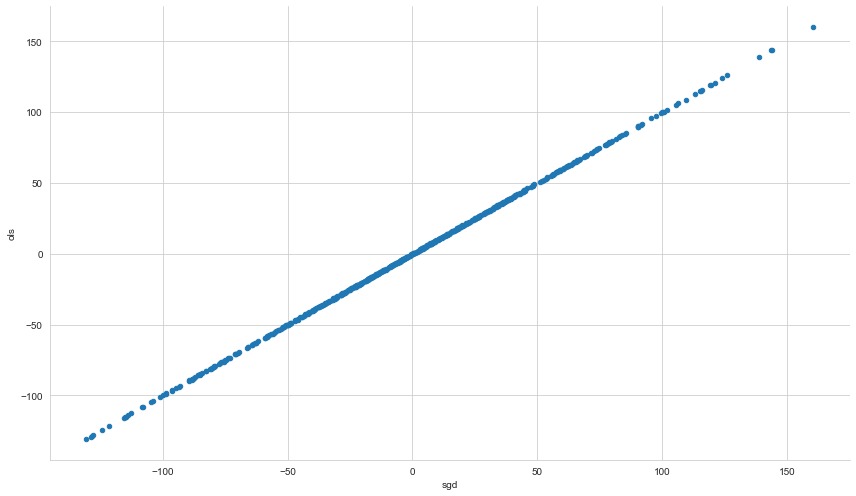

In [53]:
resids.plot.scatter(x='sgd', y='ols')
sns.despine()
plt.tight_layout();

As expected, both models yield the same result. We will now take on a more ambitious project using linear regression to estimate a multi-factor asset pricing model.